# Exploratory Data Analysis on Titanic Dataset from Kaggle.com

### First we will import necessary libraries to work on our dataset and performing EDA

In [17]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Importing the Data Set

In [18]:
df_titanic = pd.read_csv(r"E:\EDA Titanic Dataset\Datasets\titanic_train.csv")
# the dataset was obtained from Kaggle and it can be found at "https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv"

### Now we will check the dataset to understand its shape, columns and data adequacy.

In [19]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### For basic understaing of Column names and contained values some columns as described below:
#### Survived : 0 (Passenger did not survived) & 1 (Passenger survived)

#### Pclass : Categorization of passengers onboard into 1st, 2nd or 3rd Class denoted by number 1, 2, 3 respectively.

#### SibSp : Siblings or Spouse (in numbers) related to passenger present onboard.

#### Parch : Parents or Children (in numbers) related to passenger present onboard.

In [20]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Describe method quickly provides us the basic statistics of the data. 

By looking at the mean of "Survived" column we can understand that only 38% passengers survived the Titanic Accident.


In [21]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


After looking at the above data we can say that there is a lot of missing data from the column "Cabin", a few values from the column "Age" are also missing, other than that data in other columns is more or less complete.



In [22]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Now let us try to understand the demography of passengers onboard Titanic

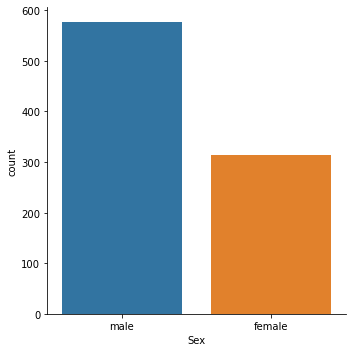

In [23]:
#First we will see the number of Males and Females onboard Titanic
sns.catplot(x = 'Sex', data = df_titanic, kind = 'count', legend = True)

Out of total number of 891 passengers there were 577 males and 314 females

In [24]:
# Getting the total number of Males and Females onboard
a = list(df_titanic['Sex'])
num_of_males = a.count('male')
num_of_females = a.count('female')
print(f'Out of total number of {len(a)} passengers there were {num_of_males} males and {num_of_females} females')

Out of total number of 891 passengers there were 577 males and 314 females


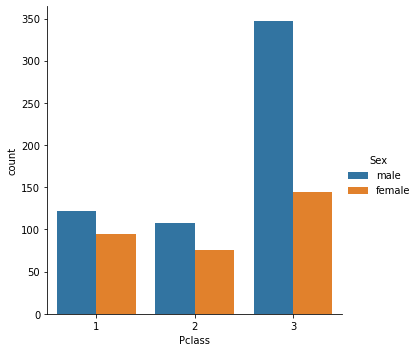

In [25]:
# We will plot a category plot to understand the number of males and females across different classes of people
# We should remember that numbers 1, 2 & 3 denote whether the passenger was travelling in the 1st, 2nd or 3rd class.

sns.catplot(x= "Pclass", data = df_titanic, kind = 'count', legend = True, hue = "Sex")

From the above plot it is clear that a out of the 3 classes most number of people were travelling in 3rd class, out of which majority were males. 

As class of travel also indicates the socio-economic status of passengers, it will be interesting to see whether socio-economic status played a role in survival of passengers.


# As we have seen in movie Titanic also, that Children and Ladies were preferred to board lifeboats, so lets create a new column where we will categorise the passengers as "male", "female" & "child" to better understand the situation and survival of passengers

In [30]:
# We are defining this function to return the category of passenger as male, female and child based on the age of passenger, and
# futrther we will apply this function to our dataset to add a new column called Category. 

def passenger_category(passenger):
    passenger_age = passenger["Age"]
    passenger_sex = passenger["Sex"]
    if passenger_age < 18:
        return "child"
    else:
        return passenger_sex        

In [32]:
#Lets apply the function to our dataset
new_df = df_titanic.copy()
df_titanic["Category"] = new_df.apply(passenger_category, axis = 1)

In [35]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


### After categorising the passengers into Male, Female and Child, let's plot the three categories in order to get more insights based on new information.

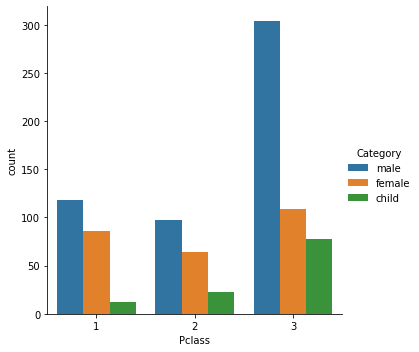

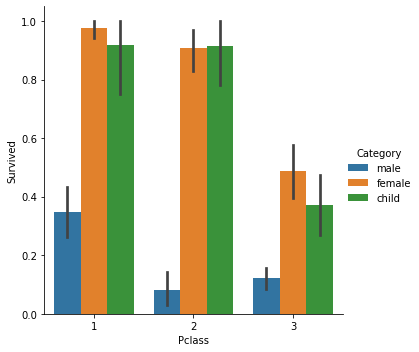

In [58]:
# A) In the First Figure we visualize the number of males, females and children in each category of passengers.
sns.catplot(x= "Pclass", data = df_titanic, kind = 'count', legend = True, hue = "Category")

# B) And in the second figure we visualize the percentage of survival within these categories of passengers. 
sns.catplot(x= "Pclass", y = "Survived", data = df_titanic, kind = 'bar', legend = True, hue = "Category")
#df_titanic.plot.bar(x= "Pclass", y = "Category" , stacked = True, alpha = 0.5)


### From the first figure we can deduct the following assumptions:
#### 1) Maximum Number of passengers belonged to class 3.

#### 2) Within class 3 maximum passengers were males and also out of total males onboard the ship, maximum number of males
####    belonged to class no 3.

#### 3) Most number of children also belonged to class 3 but female passengers were more or less equally distributed across
#### all classes.

### From the Second figure we can deduct the following assumptions:
#### 1) Ratio of male survivals was lower than other two categories (i.e. females, children) across all classes.

#### 2) Females and Children had better chances of survival across all three classes. This may be due to the fact that Children and Females were prioritized during the evacuation of ship via lifeboats.

#### 3)  More than 90% females and children belonging to class 1 and 2 survived. However the females and children of class 3 had less chances of survival than their counterparts of class 1 & 2.  This indicates that socio-economic status of passengers played a significant role in during the evcuation process.

#### 4) But we can also see that Females and Children of class 3 had slightly more number of survivals than even those Males who belonged to class 1. Which indicates that when it came to "Men" vs "Women & Children", the latter were preferred to be sent to lifeboats. 

#### 5) And finally, for Men belonging to classs 2 & 3 it was almost an impossible task to get a place on lifeboats. Which is reflected in the ratio of their survival compared to all the other classes and categories of people onboard.

### Maybe, this is the reason why Rose survived and Jack could not!!!!

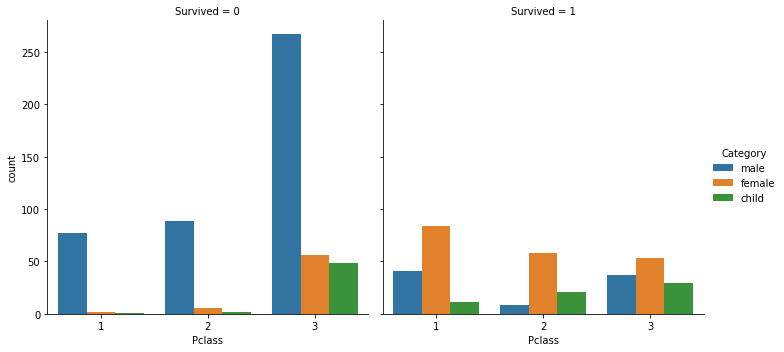

In [112]:
#lets see a quick comparison between the number of people survived vs not survived.
sns.catplot(x = "Pclass", hue = "Category", col = "Survived", kind = 'count', data= df_titanic)

# Now we will shift our focus towards age as a factor of survival.

### Let's first take a look at the age distribution of passengers.

C:\Users\ankur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

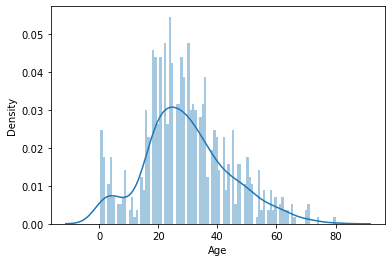

In [56]:
# We will create a density plot to see the age distribution of passengers.
sns.distplot(df_titanic["Age"], bins = 100)

From the age distribution it is clear that most number of passengers belonged to 20-40 age group.

Now when we are aware of the age distribution of passengers, let's plot a scatterplot to see the relation between age and survival of passengers:


<AxesSubplot:xlabel='Age', ylabel='Survived'>

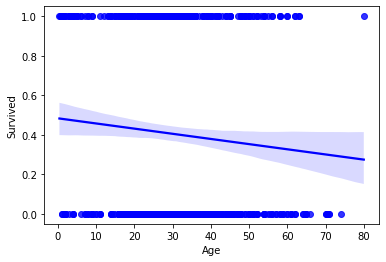

In [75]:
sns.regplot(df_titanic["Age"], df_titanic["Survived"], color = "b")

Naturally the survival rate was higher for younger people and lower for aged ones

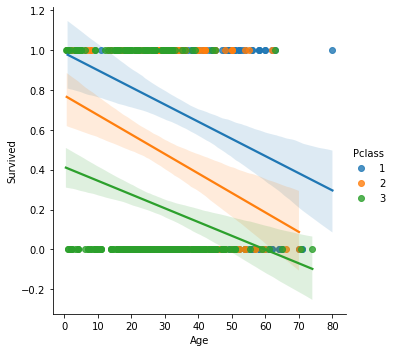

In [110]:
sns.lmplot(x = "Age", y = "Survived", hue = "Pclass", data = df_titanic)

The trend, of less chances of survival in older people, follows across all three classes of passengers.

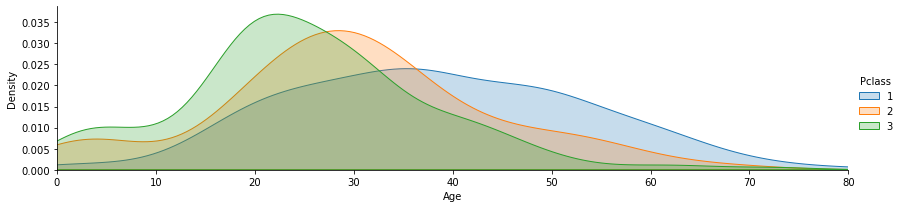

In [106]:
# Let's see the age-wise distribution of passengers of different class

x = sns.FacetGrid(df_titanic,hue='Pclass',aspect=4)

x.map(sns.kdeplot,'Age',shade=True)

max_limit = df_titanic['Age'].max()

x.set(xlim=(0,max_limit))

x.add_legend()

It is clear that:
- Most poeple travelling in 1st Class were middle-aged and older with less number of children.
- People from 2nd and 3rd Class were majorly young with comparatively lesser numer of older people and higher number of children.

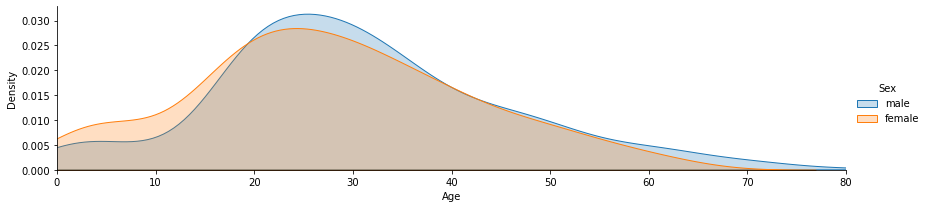

In [121]:
# We will also see the age-wise distribution of category of passengers i.e male, female and child.
x= sns.FacetGrid(df_titanic, hue = "Sex", aspect = 4)

x.map(sns.kdeplot,'Age',shade=True)

max_limit = df_titanic['Age'].max()

x.set(xlim=(0,max_limit))

x.add_legend()

In [140]:
# Age distribution of people who survived

#First we will create a new dataframe containing only list of those people who survived.

new_df = df_titanic.copy()

new_df.drop(new_df[(new_df['Survived'] == 0)].index, inplace=True)

new_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,female
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,male
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,female


C:\Users\ankur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

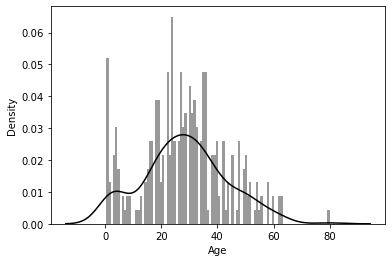

In [148]:
sns.distplot(new_df["Age"], bins = 100, color = 'black')

The above plot is the age-wise distribution of poeple who survived the titanic crash

# There is one more important information available in the dataset, which is the deck or floor on which passengers were assigned their cabins. 

- If we look as the column "Cabin" we can see that the first letter of cabin number is an alphabet indicating the floor on which the cabin was situated.

- Lets dig into this information as see what more information we can deduct from our dataset.

- It is to be noted that there is a lot of missing data from the column "Cabin" so first we will deal with the null values and then we will perform our EDA on the cleaned data.

In [153]:
# Lets create a dataset only focussing on cabin values.

cabin_df = df_titanic.copy()
cabin_df = cabin_df.dropna(axis = 0, subset = ["Cabin"])
cabin_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,female
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,male
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,female
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female


In [155]:
# now we will create a new column where only the first letter of cabin numbers are included so that we get the deck number 
# where the cabin was situated.

def get_deck_num (df_name):
    deck = df_name["Cabin"]
    return deck[0]

In [158]:
# Applying above defined function to cabin_df

cabin_df["Deck"] = cabin_df.apply(get_deck_num, axis = 1)
cabin_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,female,D
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,male,B
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,female,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,B


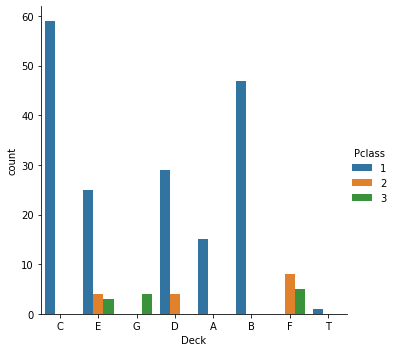

In [161]:
sns.catplot(x = "Deck", hue = "Pclass", kind = 'count', data= cabin_df)

We can assume the below mentioned details from the above plot
- It is clear from the data that floors were allotted acording to the socio-economic position of passenger.
- Decks T, A, B, & C seems to be the upper decks as they are fully reserved for the passengers of 1st class.
- Looking at the number of cabins on deck T and also the fact that it is only available for 1st class passengers, it seems that deck T was the Top floor or Terrace Floor.
- Deck D, E & F must be the middle decks as 2nd class passengers are only present on these three decks.
- Deck G may have been the lowest deck present on ship as it was only allotted to passengers travelling in 3rd class.